# A very simple Neural Network in NumPy example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mlxtend.data import loadlocal_mnist

%load_ext autoreload
%autoreload 2

In [2]:
if not os.path.exists("train-images-idx3-ubyte"):
    !curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
    !curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
    !curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
    !curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
    !gunzip t*-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0   972k      0  0:00:09  0:00:09 --:--:-- 1106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  76203      0 --:--:-- --:--:-- --:--:-- 76404
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0   759k      0  0:00:02  0:00:02 --:--:--  759k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  16576      0 --:--:-- --:--:-- --:--:-- 16637


In [3]:
X1, y1 = loadlocal_mnist(
        images_path="train-images-idx3-ubyte", 
        labels_path="train-labels-idx1-ubyte")

X2, y2 = loadlocal_mnist(
        images_path="t10k-images-idx3-ubyte", 
        labels_path="t10k-labels-idx1-ubyte")

X1 = X1.reshape(X1.shape[0], -1) / 255
X2 = X2.reshape(X2.shape[0], -1) /255

X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])

X.shape, y.shape

((70000, 784), (70000,))

In [17]:
def step(X, y, cache, batch_size=120, lr=0.01, reg=0.01):
    W1, b1, W2, b2 = cache
    batch_indices = np.random.randint(0, X.shape[0], batch_size)
    batch_y = y[batch_indices]
    onehot_groudtruth = np.zeros((batch_size, n_classes))
    onehot_groudtruth[np.arange(batch_size), batch_y] = 1
    
    # forward prop
    a1 = X[batch_indices]
    z1 = a1 @ W1 + b1
    a2 = z1 * (z1 > 0) #ReLU
    z2 = a2 @ W2 + b2
    scores = z2
    
    # calcualte accuracy 
    y_pred = np.argmax(scores, axis=1)
    acc = (y_pred == batch_y).sum() / batch_size
    
    # softmax loss
    scores_e = np.e ** scores
    scores_gt = scores_e[np.arange(batch_y.shape[0]), batch_y]
    scores_e_sums = scores_e.sum(axis=1)
    loss = ((-np.log(scores_gt / scores_e_sums)).sum() / a1.shape[0] + 
        reg * (np.sum(W1 ** 2) + np.sum(W2 ** 2)))
    # gradients  
    dscores = ((scores_e.T / scores_e_sums).T - onehot_groudtruth) / scores.shape[0]
    dz2 = dscores
    dW2 = a2.T @ dz2 + 2 * reg * W2
    db2 = dz2.sum(axis=0)
    da2 = dz2 @ W2.T
    dz1 = da2 * (z1 > 0) #ReLU
    dW1 = a1.T @ dz1 + 2* reg * W1
    db1 = dz1.sum(axis=0)
    da1 = dz1 @ W1.T # this is the gradient of input with respect to loss
    
    # gradient descent
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    return loss, acc, (W1, b1, W2, b2)

In [18]:
n_features = 784
n_classes = 10
hidden_size = 100
W1 = np.random.randn(n_features, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, n_classes)
b2 = np.random.randn(n_classes)

cache = (W1, b1, W2, b2)

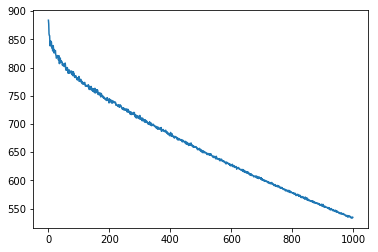

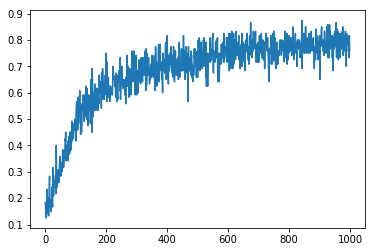

In [19]:
l = []
a = []
n_steps = 1000
for i in range(n_steps):
    sc_l, acc, cache = step(X1, y1, cache)
    l.append(sc_l)
    a.append(acc)
    
plt.plot(np.arange(n_steps), l)
plt.show()

plt.plot(np.arange(n_steps), a)
plt.show()